### Elias Ibrahim GSR/1258/16

#### 1. Epsilon-Greedy Implementation

In [1]:
import numpy as np

In [2]:
def epsilon_greedy(num_arms, true_reward_distributions, num_steps, epsilon):
    # Initialize the estimated reward for each arm
    estimated_rewards = np.zeros(num_arms)
    # Initialize the number of times each arm has been pulled
    arm_counts = np.zeros(num_arms)
    total_reward = 0

    for step in range(num_steps):
        # Decide whether to explore or exploit
        if np.random.rand() < epsilon:
            # Explore: choose a random arm
            chosen_arm = np.random.randint(num_arms)
        else:
            # Exploit: choose the arm with the highest estimated reward
            chosen_arm = np.argmax(estimated_rewards)

        # Pull the chosen arm and observe the reward
        reward = np.random.normal(true_reward_distributions[chosen_arm], 1.0)
        total_reward += reward

        # Update the estimated reward for the chosen arm
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / arm_counts[chosen_arm]

    return total_reward

In [4]:
num_arms = 5
true_reward_distributions = [5.0, 3.0, 7.0, 2.0, 4.0]  # Mean rewards for each arm
num_steps = 1000
epsilon_values = [0.01, 0.1, 0.5]

In [5]:
for epsilon in epsilon_values:
    total_reward = epsilon_greedy(num_arms, true_reward_distributions, num_steps, epsilon)
    print(f"Epsilon: {epsilon}, Total Reward: {total_reward}")

Epsilon: 0.01, Total Reward: 5470.316660179572
Epsilon: 0.1, Total Reward: 6696.840078488653
Epsilon: 0.5, Total Reward: 5654.024132287425


#### 2. UCB (Upper Confidence Bound) Algorithm

In [6]:
def ucb(num_arms, true_reward_distributions, num_steps, c):
    # Initialize the estimated reward for each arm
    estimated_rewards = np.zeros(num_arms)
    # Initialize the number of times each arm has been pulled
    arm_counts = np.zeros(num_arms)
    total_reward = 0

    # Pull each arm once to initialize
    for arm in range(num_arms):
        reward = np.random.normal(true_reward_distributions[arm], 1.0)
        total_reward += reward
        arm_counts[arm] += 1
        estimated_rewards[arm] = reward

    for step in range(num_arms, num_steps):
        # Calculate the UCB value for each arm
        ucb_values = estimated_rewards + c * np.sqrt(np.log(step) / arm_counts)
        # Choose the arm with the highest UCB value
        chosen_arm = np.argmax(ucb_values)

        # Pull the chosen arm and observe the reward
        reward = np.random.normal(true_reward_distributions[chosen_arm], 1.0)
        total_reward += reward

        # Update the estimated reward for the chosen arm
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm]) / arm_counts[chosen_arm]

    return total_reward

In [7]:
num_arms = 5
true_reward_distributions = [5.0, 3.0, 7.0, 2.0, 4.0]  # Mean rewards for each arm
num_steps = 1000
c_values = [0.1, 1.0, 2.0]  # Exploration parameter for UCB

for c in c_values:
    total_reward = ucb(num_arms, true_reward_distributions, num_steps, c)
    print(f"UCB (c={c}), Total Reward: {total_reward}")

UCB (c=0.1), Total Reward: 7002.540438547405
UCB (c=1.0), Total Reward: 6982.172081022118
UCB (c=2.0), Total Reward: 6971.3925756777635


##### Epsilon-Greedy vs UCB

In [8]:
epsilon_values = [0.01, 0.1, 0.5]

for epsilon in epsilon_values:
    total_reward = epsilon_greedy(num_arms, true_reward_distributions, num_steps, epsilon)
    print(f"Epsilon-Greedy (epsilon={epsilon}), Total Reward: {total_reward}")

Epsilon-Greedy (epsilon=0.01), Total Reward: 6843.349346558549
Epsilon-Greedy (epsilon=0.1), Total Reward: 6526.040123914318
Epsilon-Greedy (epsilon=0.5), Total Reward: 5554.648161198309


#### 3. Thompson Sampling for Bernoulli Bandits

In [18]:
def thompson_sampling(num_arms, true_success_probabilities, num_steps):

    # Initialize alpha and beta parameters for the Beta distribution of each arm
    alpha = np.ones(num_arms)  # Success counts
    beta = np.ones(num_arms)   # Failure counts
    total_reward = 0

    for step in range(num_steps):
        # Sample a success probability for each arm from its Beta distribution
        sampled_probs = np.random.beta(alpha, beta)
        # Choose the arm with the highest sampled probability
        chosen_arm = np.argmax(sampled_probs)

        # Pull the chosen arm and observe the reward (1 for success, 0 for failure)
        reward = np.random.binomial(1, true_success_probabilities[chosen_arm])
        total_reward += reward

        # Update the alpha and beta parameters for the chosen arm
        if reward == 1:
            alpha[chosen_arm] += 1
        else:
            beta[chosen_arm] += 1

    return total_reward

In [16]:
num_arms = 5
true_success_probabilities = [0.2, 0.5, 0.7, 0.3, 0.6]  # True success probabilities for each arm
num_steps = 1000

In [17]:
total_reward = thompson_sampling(num_arms, true_success_probabilities, num_steps)
print(f"Thompson Sampling, Total Reward: {total_reward}")

Thompson Sampling, Total Reward: 656


##### Epsilon-Greedy vs UCB vs Thompson Sampling

In [10]:
import matplotlib.pyplot as plt

def run_comparison(num_arms, true_success_probabilities, num_steps, epsilon, c):
    # Initialize variables to track cumulative rewards
    ts_rewards = []
    eg_rewards = []
    ucb_rewards = []

    # Initialize parameters for each algorithm
    alpha = np.ones(num_arms)
    beta = np.ones(num_arms)
    estimated_rewards_eg = np.zeros(num_arms)
    arm_counts_eg = np.zeros(num_arms)
    estimated_rewards_ucb = np.zeros(num_arms)
    arm_counts_ucb = np.zeros(num_arms)

    for step in range(num_steps):
        # Thompson Sampling
        sampled_probs = np.random.beta(alpha, beta)
        chosen_arm_ts = np.argmax(sampled_probs)
        reward_ts = np.random.binomial(1, true_success_probabilities[chosen_arm_ts])
        if reward_ts == 1:
            alpha[chosen_arm_ts] += 1
        else:
            beta[chosen_arm_ts] += 1
        ts_rewards.append(reward_ts)

        # Epsilon-Greedy
        if np.random.rand() < epsilon:
            chosen_arm_eg = np.random.randint(num_arms)
        else:
            chosen_arm_eg = np.argmax(estimated_rewards_eg)
        reward_eg = np.random.binomial(1, true_success_probabilities[chosen_arm_eg])
        arm_counts_eg[chosen_arm_eg] += 1
        estimated_rewards_eg[chosen_arm_eg] += (reward_eg - estimated_rewards_eg[chosen_arm_eg]) / arm_counts_eg[chosen_arm_eg]
        eg_rewards.append(reward_eg)

        # UCB
        if step < num_arms:
            chosen_arm_ucb = step
        else:
            ucb_values = estimated_rewards_ucb + c * np.sqrt(np.log(step) / arm_counts_ucb)
            chosen_arm_ucb = np.argmax(ucb_values)
        reward_ucb = np.random.binomial(1, true_success_probabilities[chosen_arm_ucb])
        arm_counts_ucb[chosen_arm_ucb] += 1
        estimated_rewards_ucb[chosen_arm_ucb] += (reward_ucb - estimated_rewards_ucb[chosen_arm_ucb]) / arm_counts_ucb[chosen_arm_ucb]
        ucb_rewards.append(reward_ucb)

    # Calculate cumulative rewards
    ts_cumulative = np.cumsum(ts_rewards)
    eg_cumulative = np.cumsum(eg_rewards)
    ucb_cumulative = np.cumsum(ucb_rewards)

    # Plot the results
    plt.plot(ts_cumulative, label="Thompson Sampling")
    plt.plot(eg_cumulative, label="Epsilon-Greedy")
    plt.plot(ucb_cumulative, label="UCB")
    plt.xlabel("Steps")
    plt.ylabel("Cumulative Reward")
    plt.title("Comparison of Thompson Sampling, Epsilon-Greedy, and UCB")
    plt.legend()
    plt.show()

In [11]:
# Run the comparison
num_arms = 5
true_success_probabilities = [0.2, 0.5, 0.7, 0.3, 0.6]
num_steps = 1000
epsilon = 0.1
c = 1.0

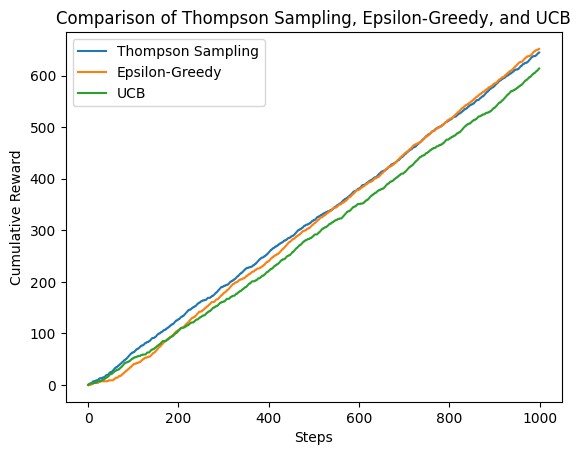

In [12]:
run_comparison(num_arms, true_success_probabilities, num_steps, epsilon, c)